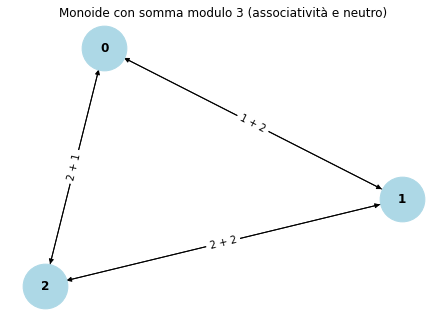

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_monoid():
    elements = [0, 1, 2]
    operation = lambda a, b: (a + b) % 3
    G = nx.DiGraph()
    G.add_nodes_from(elements)
    for a in elements:
        for b in elements:
            G.add_edge(a, operation(a, b), label=f"{a} + {b}")
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title("Monoide con somma modulo 3 (associatività e neutro)")
    plt.show()

visualize_monoid()


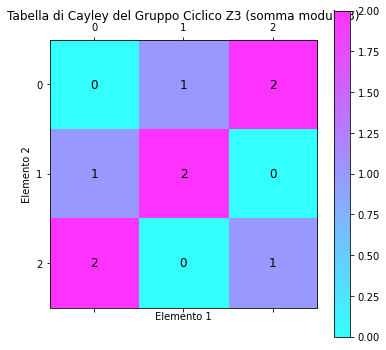

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_group_cayley():
    elements = [0, 1, 2]
    operation = lambda a, b: (a + b) % 3
    cayley_table = np.zeros((len(elements), len(elements)), dtype=int)
    for i, a in enumerate(elements):
        for j, b in enumerate(elements):
            cayley_table[i, j] = operation(a, b)
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(cayley_table, cmap='cool', alpha=0.8)
    for (i, j), val in np.ndenumerate(cayley_table):
        ax.text(j, i, val, ha='center', va='center', color='black', fontsize=12)
    plt.title("Tabella di Cayley del Gruppo Ciclico Z3 (somma modulo 3)", pad=20)
    plt.xlabel("Elemento 1")
    plt.ylabel("Elemento 2")
    plt.xticks(range(len(elements)), elements)
    plt.yticks(range(len(elements)), elements)
    plt.colorbar(cax)
    plt.show()

visualize_group_cayley()


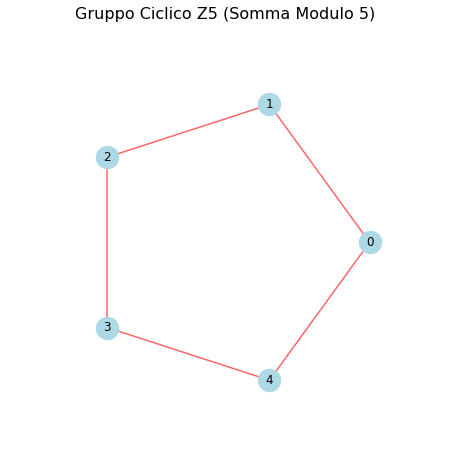

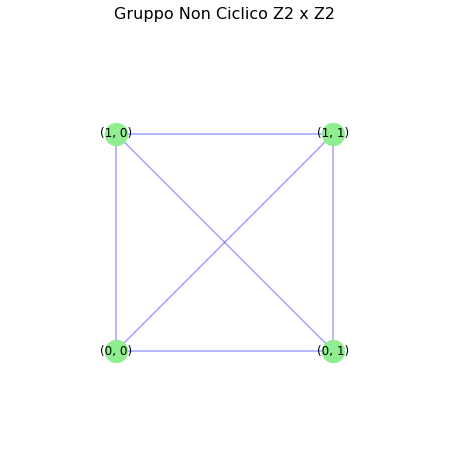

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cyclic_group():
    """
    Visualizza un gruppo ciclico (Z5 con somma modulo 5)
    """
    elements = [0, 1, 2, 3, 4]  # Elementi del gruppo ciclico Z5
    n = len(elements)
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)  # Angoli dei vertici

    # Posizioni dei vertici
    x = np.cos(theta)
    y = np.sin(theta)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Disegno dei nodi
    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.scatter(xi, yi, s=500, c='lightblue', zorder=2)
        ax.text(xi, yi, str(elements[i]), fontsize=12, ha='center', va='center')

    # Collegamenti con la somma modulo 5 (generazione ciclica)
    for i in range(n):
        start = elements[i]
        end = (start + 1) % 5  # Successivo nella somma modulo 5
        start_index = elements.index(start)
        end_index = elements.index(end)
        ax.plot([x[start_index], x[end_index]], [y[start_index], y[end_index]], 
                'r-', alpha=0.6, zorder=1)

    # Personalizzazione del grafico
    ax.set_title("Gruppo Ciclico Z5 (Somma Modulo 5)", fontsize=16)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.axis('off')

    plt.show()

def visualize_non_cyclic_group():
    """
    Visualizza un gruppo non ciclico (Z2 x Z2 con somma elemento per elemento)
    """
    elements = [(0, 0), (0, 1), (1, 0), (1, 1)]  # Elementi di Z2 x Z2
    n = len(elements)
    positions = [(0, 0), (1, 0), (0, 1), (1, 1)]  # Posizioni grafiche dei nodi

    fig, ax = plt.subplots(figsize=(8, 8))

    # Disegno dei nodi
    for i, pos in enumerate(positions):
        ax.scatter(pos[0], pos[1], s=500, c='lightgreen', zorder=2)
        ax.text(pos[0], pos[1], str(elements[i]), fontsize=12, ha='center', va='center')

    # Collegamenti tra elementi (mostrano la struttura non ciclica)
    for a in elements:
        for b in elements:
            sum_ab = ((a[0] + b[0]) % 2, (a[1] + b[1]) % 2)  # Somma elemento per elemento modulo 2
            start_index = elements.index(a)
            end_index = elements.index(sum_ab)
            start_pos = positions[start_index]
            end_pos = positions[end_index]
            ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 
                    'b-', alpha=0.2, zorder=1)

    # Personalizzazione del grafico
    ax.set_title("Gruppo Non Ciclico Z2 x Z2", fontsize=16)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_aspect('equal')
    ax.axis('off')

    plt.show()

# Visualizza il gruppo ciclico e il gruppo non ciclico
visualize_cyclic_group()
visualize_non_cyclic_group()


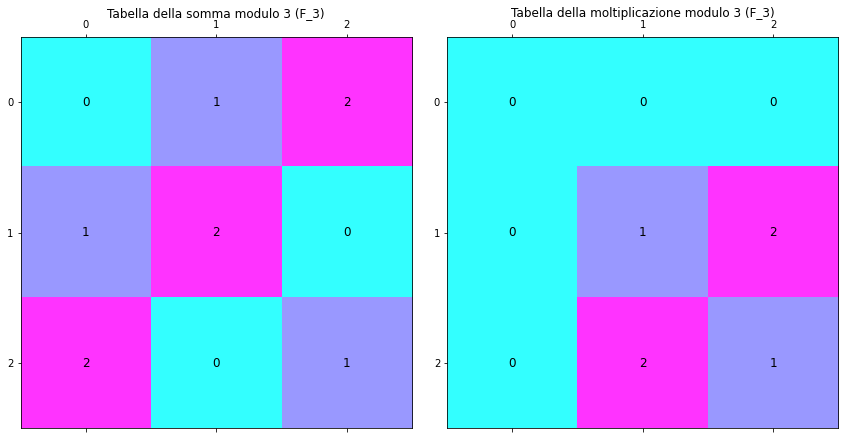

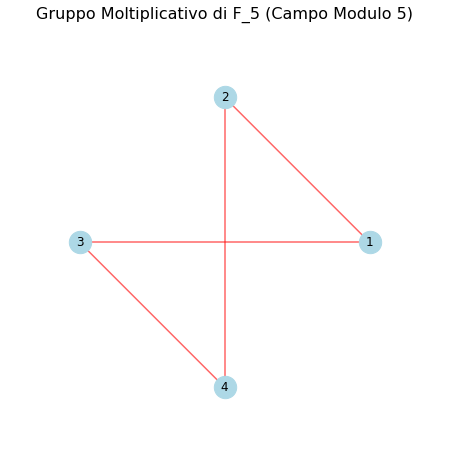

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_field():
    """
    Visualizza il campo finito F_3 con somma e moltiplicazione modulo 3
    """
    # Elementi del campo
    elements = [0, 1, 2]
    # Operazioni modulo 3
    sum_operation = lambda a, b: (a + b) % 3
    mul_operation = lambda a, b: (a * b) % 3

    # Creazione delle tabelle
    sum_table = np.zeros((len(elements), len(elements)), dtype=int)
    mul_table = np.zeros((len(elements), len(elements)), dtype=int)
    for i, a in enumerate(elements):
        for j, b in enumerate(elements):
            sum_table[i, j] = sum_operation(a, b)
            mul_table[i, j] = mul_operation(a, b)

    # Visualizzazione delle tabelle
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Tabella della somma
    axs[0].matshow(sum_table, cmap='cool', alpha=0.8)
    for (i, j), val in np.ndenumerate(sum_table):
        axs[0].text(j, i, val, ha='center', va='center', color='black', fontsize=12)
    axs[0].set_title("Tabella della somma modulo 3 (F_3)", pad=20)
    axs[0].set_xticks(range(len(elements)))
    axs[0].set_yticks(range(len(elements)))
    axs[0].set_xticklabels(elements)
    axs[0].set_yticklabels(elements)
    
    # Tabella della moltiplicazione
    axs[1].matshow(mul_table, cmap='cool', alpha=0.8)
    for (i, j), val in np.ndenumerate(mul_table):
        axs[1].text(j, i, val, ha='center', va='center', color='black', fontsize=12)
    axs[1].set_title("Tabella della moltiplicazione modulo 3 (F_3)", pad=20)
    axs[1].set_xticks(range(len(elements)))
    axs[1].set_yticks(range(len(elements)))
    axs[1].set_xticklabels(elements)
    axs[1].set_yticklabels(elements)
    
    plt.tight_layout()
    plt.show()



def visualize_field_multiplicative_group():
    elements = [1, 2, 3, 4]  # Elementi invertibili di F_5
    n = len(elements)
    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)  # Angoli dei vertici

    # Posizioni dei vertici
    x = np.cos(theta)
    y = np.sin(theta)

    fig, ax = plt.subplots(figsize=(8, 8))

    # Disegno dei nodi
    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.scatter(xi, yi, s=500, c='lightblue', zorder=2)
        ax.text(xi, yi, str(elements[i]), fontsize=12, ha='center', va='center')

    # Collegamenti con la moltiplicazione (2 come generatore ciclico)
    generator = 2
    for i in range(n):
        start = elements[i]
        end = (start * generator) % 5
        start_index = elements.index(start)
        end_index = elements.index(end)
        ax.plot([x[start_index], x[end_index]], [y[start_index], y[end_index]], 
                'r-', alpha=0.6, zorder=1)

    # Personalizzazione del grafico
    ax.set_title("Gruppo Moltiplicativo di F_5 (Campo Modulo 5)", fontsize=16)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.axis('off')

    plt.show()

# Visualizza il campo finito F_3
visualize_field()

# Visualizza il gruppo moltiplicativo di F_5
visualize_field_multiplicative_group()


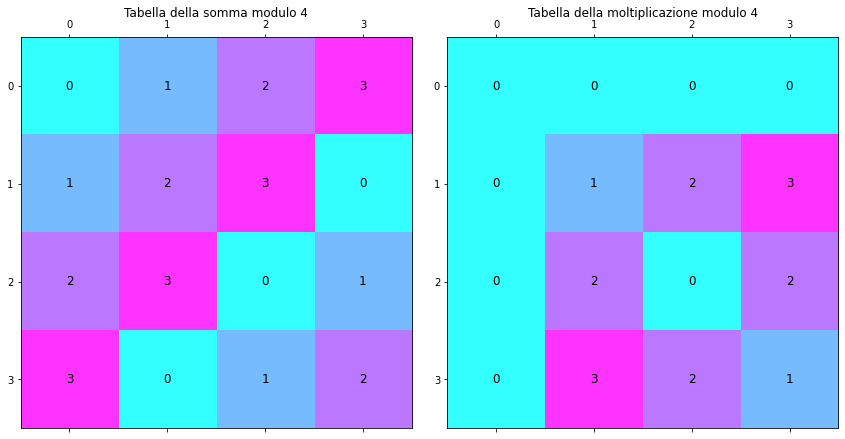

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_ring():
    elements = [0, 1, 2, 3]
    sum_operation = lambda a, b: (a + b) % 4
    mul_operation = lambda a, b: (a * b) % 4
    sum_table = np.zeros((len(elements), len(elements)), dtype=int)
    mul_table = np.zeros((len(elements), len(elements)), dtype=int)
    for i, a in enumerate(elements):
        for j, b in enumerate(elements):
            sum_table[i, j] = sum_operation(a, b)
            mul_table[i, j] = mul_operation(a, b)
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].matshow(sum_table, cmap='cool', alpha=0.8)
    for (i, j), val in np.ndenumerate(sum_table):
        axs[0].text(j, i, val, ha='center', va='center', color='black', fontsize=12)
    axs[0].set_title("Tabella della somma modulo 4", pad=20)
    axs[0].set_xticks(range(len(elements)))
    axs[0].set_yticks(range(len(elements)))
    axs[0].set_xticklabels(elements)
    axs[0].set_yticklabels(elements)
    axs[1].matshow(mul_table, cmap='cool', alpha=0.8)
    for (i, j), val in np.ndenumerate(mul_table):
        axs[1].text(j, i, val, ha='center', va='center', color='black', fontsize=12)
    axs[1].set_title("Tabella della moltiplicazione modulo 4", pad=20)
    axs[1].set_xticks(range(len(elements)))
    axs[1].set_yticks(range(len(elements)))
    axs[1].set_xticklabels(elements)
    axs[1].set_yticklabels(elements)
    plt.tight_layout()
    plt.show()

visualize_ring()
